# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# откройте данные: ваш код здесь
df = pd.read_csv('data/spam_or_not_spam.zip')
df.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [3]:
# рассчитайте частоты для классов : ваш код здесь
df['label'].value_counts()

label
0    2500
1     500
Name: count, dtype: int64

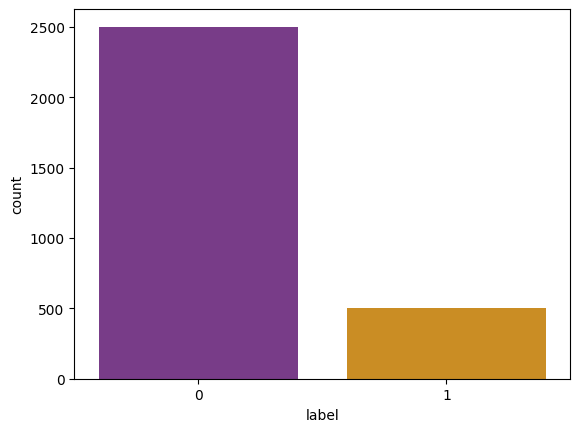

In [4]:
# визуализируйте результат: ваш код здесь
import seaborn as sns
sns.countplot(x='label', data=df, palette='CMRmap');

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [6]:
#ваш код здесь
df['email'] = df['email'].str.strip()
df = df.replace('', np.nan)
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2997 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2997 non-null   object
 1   label   2997 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 70.2+ KB


Переводим данные в векторный вид:

In [7]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["email"])

Определите, сколько теперь признаков в нашем наборе данных:

In [8]:
#ваш код здесь
X.shape[1]

34116

## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [9]:
#ваш код здесь
y = df['label']
display(X.shape)
display(y.shape)

(2997, 34116)

(2997,)

Разделите выборку на обучающую и тестовую, используя стратифицированное разбиение (параметр `stratify` установите в значение вектора ответов y) размер тестовой выборки (`test_size`) возьмите как 0.25, параметр `random_state` определите со значением 42:

In [10]:
#ваш код здесь
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.25)

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [11]:
#ваш код здесь
y_test.mean().round(3)

0.165

## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [12]:
#ваш код здесь
from sklearn.naive_bayes import ComplementNB

model = ComplementNB(alpha=0.01)
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)

Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [13]:
#ваш код здесь
from sklearn import metrics 

print(metrics.classification_report(y_test, y_test_pred, digits=3))

              precision    recall  f1-score   support

           0      0.986     1.000     0.993       626
           1      1.000     0.927     0.962       124

    accuracy                          0.988       750
   macro avg      0.993     0.964     0.978       750
weighted avg      0.988     0.988     0.988       750



Нарисуйте ROC-кривую:

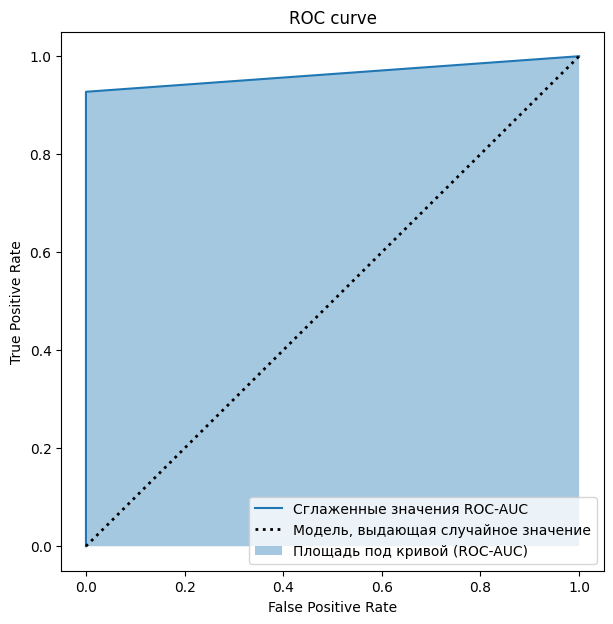

In [14]:
#ваш код здесь
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

false_positive_rates, true_positive_rates, threshold = roc_curve(y_test, y_test_pred)

# создаём график
plt.figure(figsize=(7, 7))

# рисуем кривую
plt.plot(false_positive_rates, true_positive_rates, 
         label='Сглаженные значения ROC-AUC')

# кривая, соответствующая случайному угадыванию
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle=':', 
         label='Модель, выдающая случайное значение')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.fill_between(false_positive_rates, true_positive_rates,
                 alpha=0.4, label='Площадь под кривой (ROC-AUC)')
plt.legend()
plt.show()

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [16]:
#ваш код здесь
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]}

grid_search = GridSearchCV(
    estimator=ComplementNB(), 
    param_grid=param_grid, 
    cv=5, 
    n_jobs = -1
)  

grid_search.fit(X_train, y_train)

y_test_pred = grid_search.predict(X_test)

print("Наилучшие значения гиперпараметров: {}".format(grid_search.best_params_))
print('Значения метрик:')
print(metrics.classification_report(y_test, y_test_pred, digits=3))

Наилучшие значения гиперпараметров: {'alpha': 0.07}
Значения метрик:
              precision    recall  f1-score   support

           0      0.994     0.998     0.996       626
           1      0.992     0.968     0.980       124

    accuracy                          0.993       750
   macro avg      0.993     0.983     0.988       750
weighted avg      0.993     0.993     0.993       750



Значения метрик подросли. Качество классификации зависит от параметра alpha.